## **EDA AND PREPROCESSING ON DATA SET (DIABETES)**

### **Importing libraries and dataset**

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

### **Step 1**
- ***Loading data set***

In [10]:
diabetes = load_diabetes()

### **Step 2**
- ***Converting data set into data frame***

In [11]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

- ***adding y label as target***

In [13]:
df['target'] = diabetes.target

- ***Printing first 5 rows of data set***

In [58]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### **Step 3**
- Perform some basic functions

- **describe()**
    - ***apply statistical functions on numerical columns like mean, mode, min, max, standard deviation***

In [ ]:
df.describe() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


- **info()**
    - ***gives summary of data set set including the data types of data set***

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### **Step 4**
- ***Checking for missing values***

In [18]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

***It shows us that there is no empty column, so we don't need to drop any column or row.***

### **Step 5**
- ***Performing EDA***

- ***Distribution of each feature (Histogram)***
    - ***It gives us the information that each feature is normally distributed or not.***

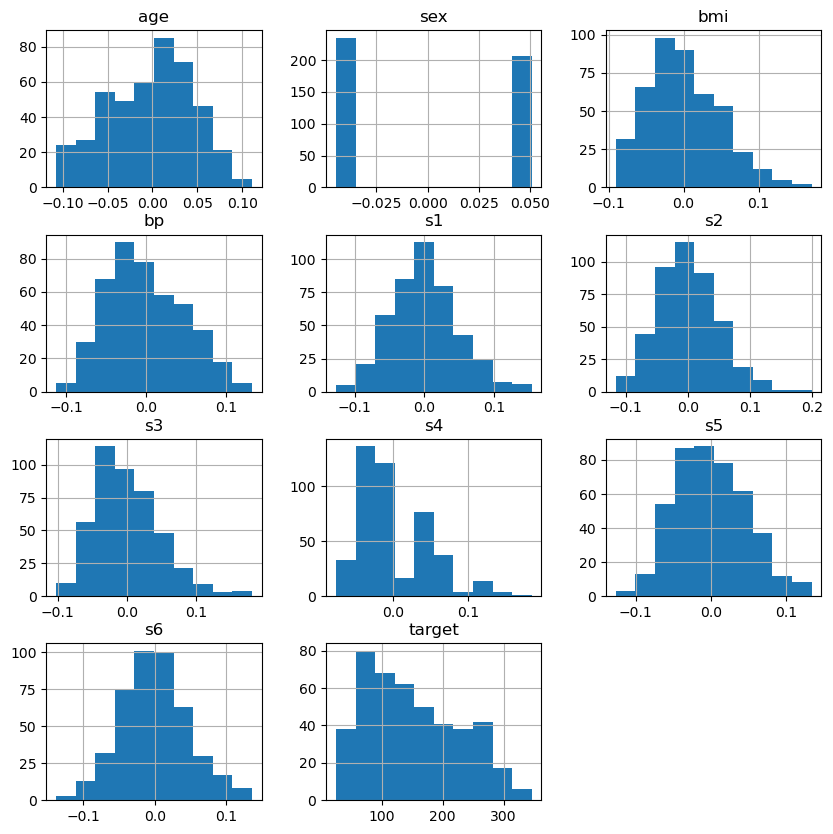

In [24]:
df.hist(figsize=(10,10))
plt.show()

- ***Correlation Heatmap***
    - ***It shows us which feature is strongly related to "target"***

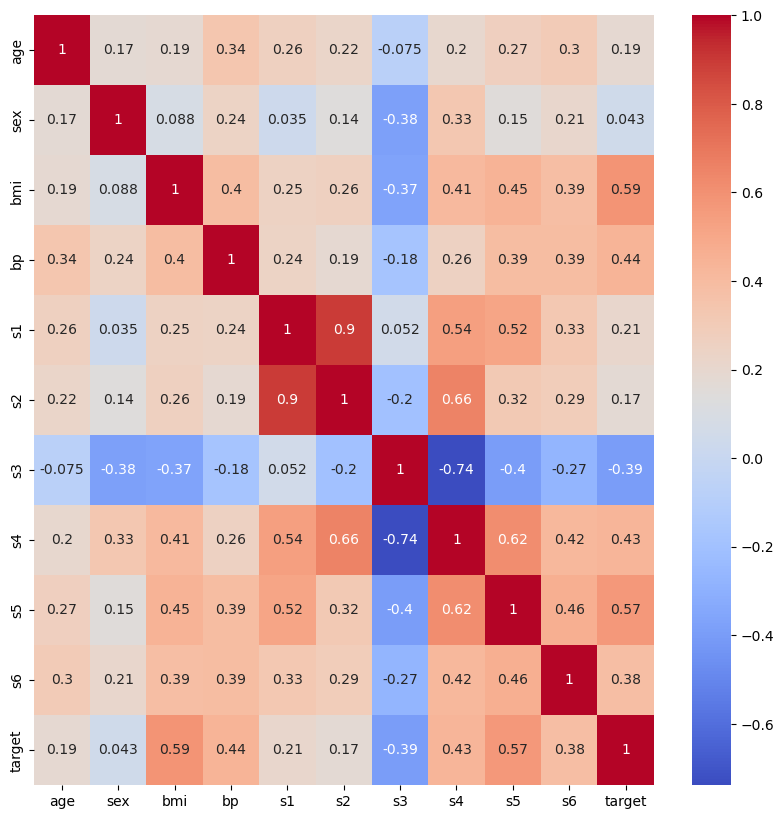

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### **Step 6 Feature Selection (Important features)**
- ***Those features whose correlation is strong with "target" feature***

In [35]:
# Important features
bmi = df['bmi']
bp = df['bp']
s5 = df['s5']
target = df['target']

### Step 7 Relationship visualization with Target 

- ***Scatter Plot (bmi - target)***

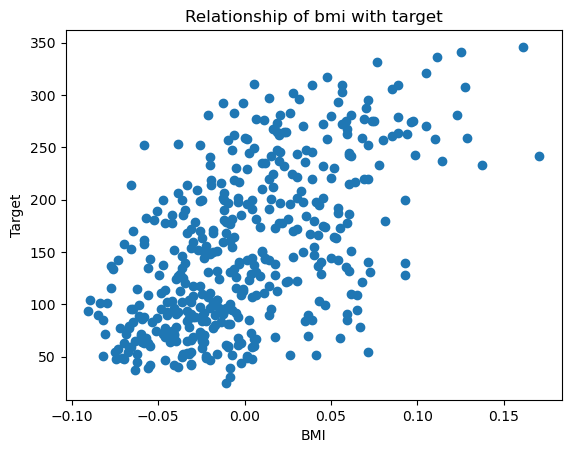

In [36]:
plt.scatter(x=bmi, y=target)
plt.title('Relationship of bmi with target')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()

- ***Scatter Plot (bp - target)***

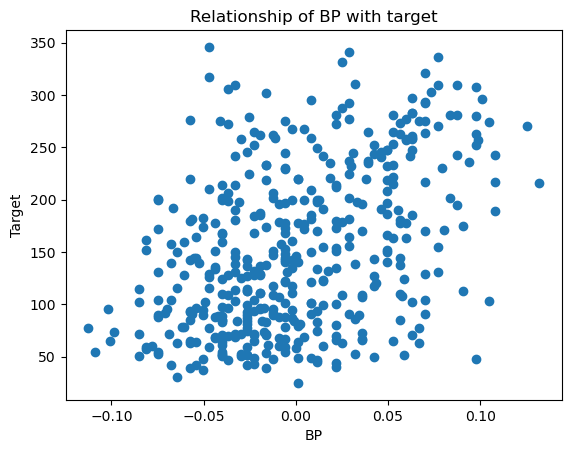

In [37]:
plt.scatter(x=bp, y=target)
plt.title('Relationship of BP with target')
plt.xlabel('BP')
plt.ylabel('Target')
plt.show()

- ***Scatter Plot (s5[blood serum5] - target)***

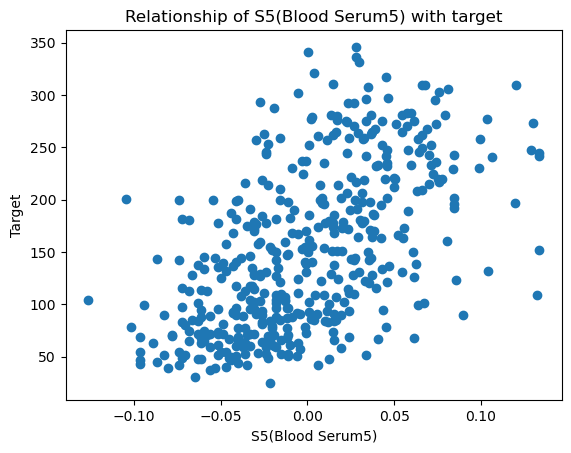

In [38]:
plt.scatter(x=s5, y=target)
plt.title('Relationship of S5(Blood Serum5) with target')
plt.xlabel('S5(Blood Serum5)')
plt.ylabel('Target')
plt.show()

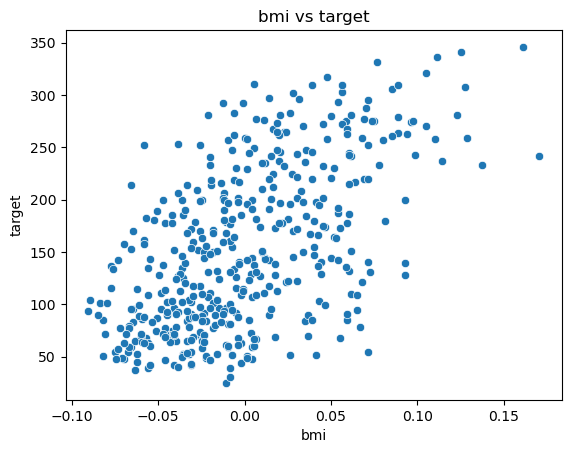

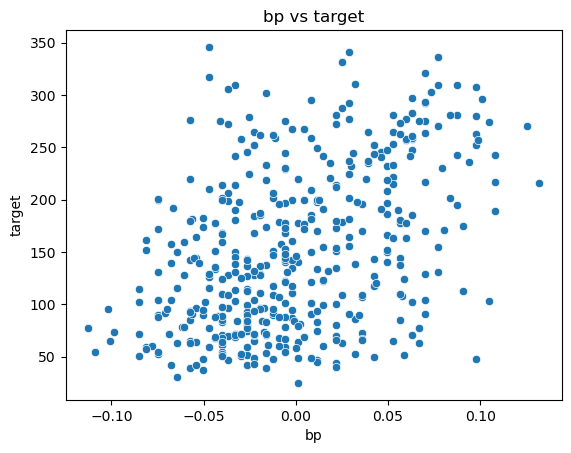

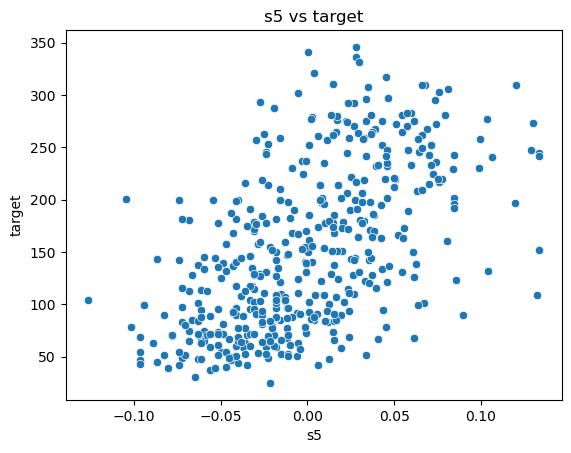

In [40]:
for col in ['bmi', 'bp', 's5']:
    sns.scatterplot(x=col, y='target', data=df)
    plt.title(f'{col} vs target')
    plt.show()

- ***Pair Plot***

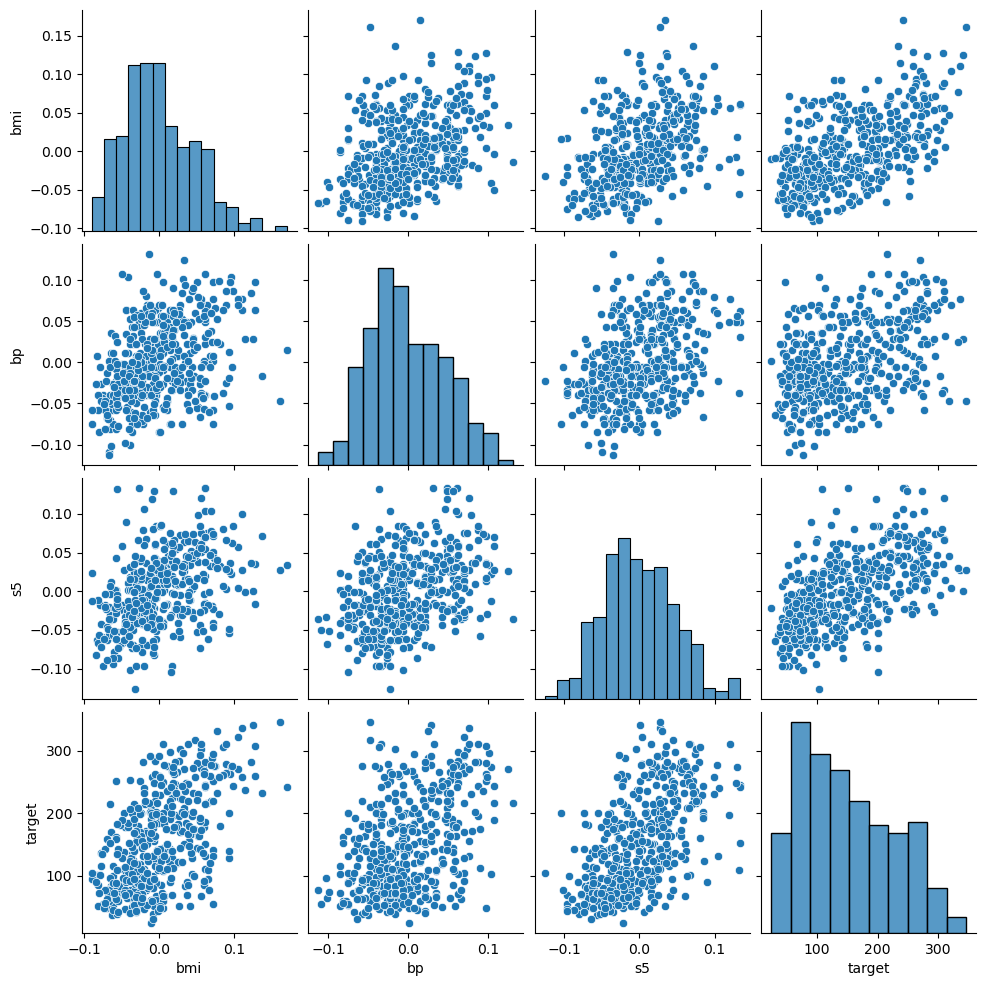

In [46]:
selected_cols = ['bmi', 'bp', 's5', 'target']

sns.pairplot(df[selected_cols])
plt.show()

### **Step 8**
- ***Outlier Detection using (Boxplot)***

- ***outlier detection in bmi***

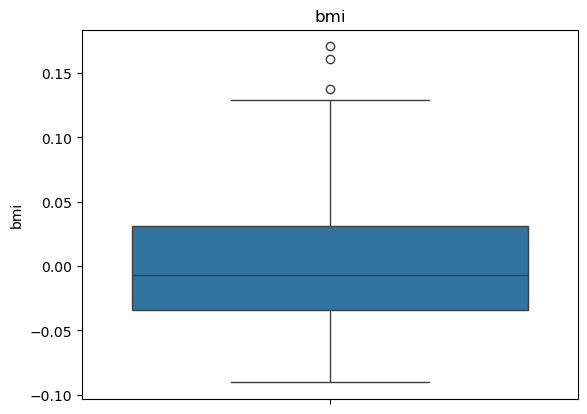

In [45]:
sns.boxplot(bmi)
plt.title('bmi')
plt.show()

- ***Cheecking outlier in each feature***

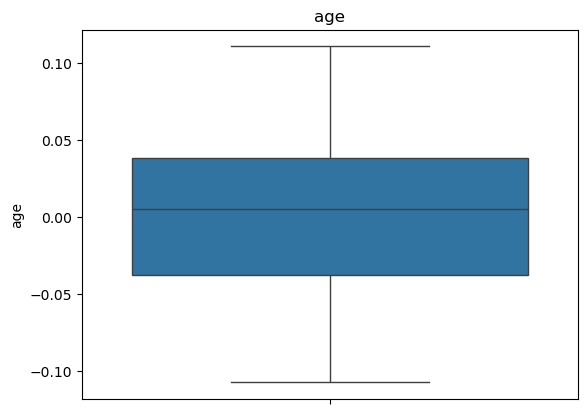

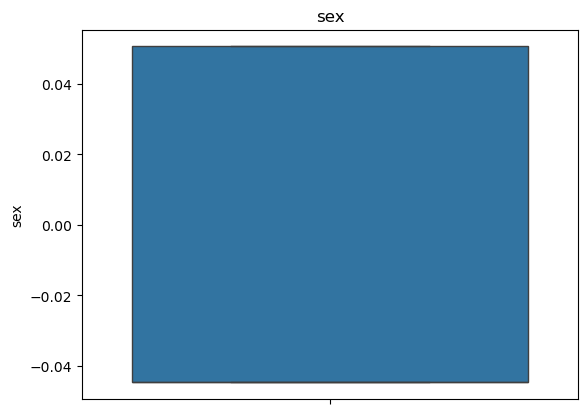

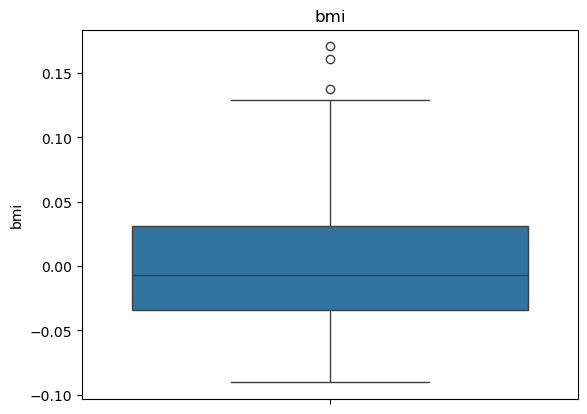

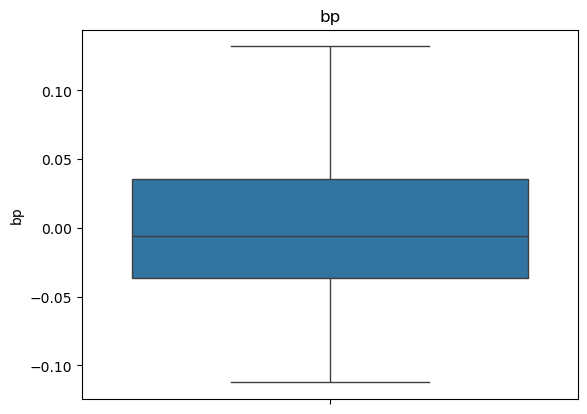

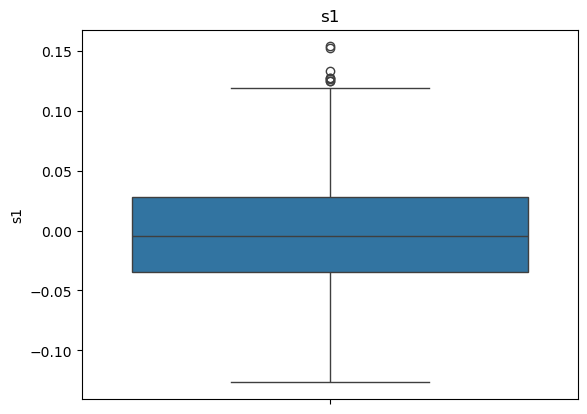

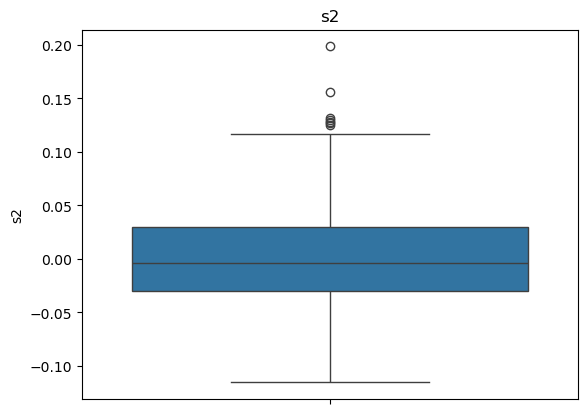

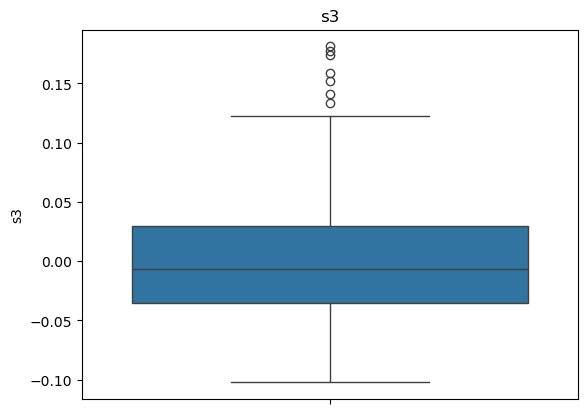

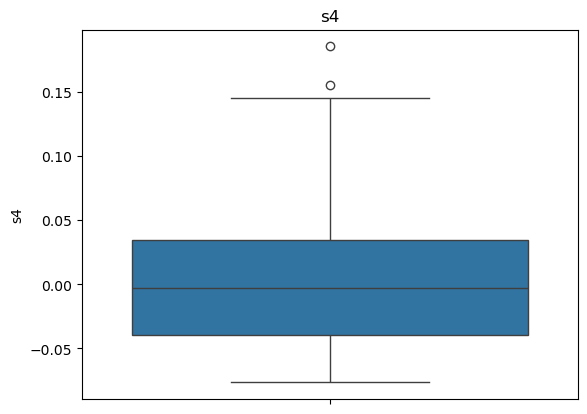

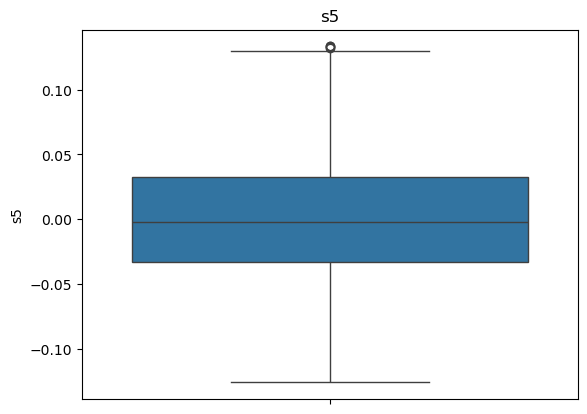

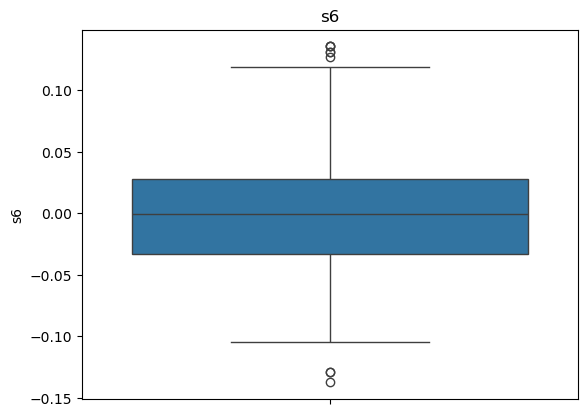

In [44]:
for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

### **Step 9**
- #### ***Data Preprocessing (Normalization/Standardization)***

**Normalization**

- ***Separate data(x) and target data(y)***

In [47]:
x = df.drop('target', axis=1)
y = df['target']

- ***Divide dataset into Train-Test split***
    - ***Training set(leaning for model)***
    - ***Testing set(checking for model)***

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

**Standardization**
- ***It means each feature mean is 0 and standard deviation = 1***
    - ***X_train_scaled --> standardized features for model training***
    - ***X_test_scaled --> standardized features for model evaluation***

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.transform(x_test)

### **Step 10 Model Training (Linear Regression)**

In [53]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### **Step 11 Model Testing**

In [54]:
y_pred = model.predict(X_test_scaled)

- ***Checking accuracy and performance***

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 2900.1936284934823
R2 score: 0.45260276297191926
